<div style="border: 1px solid thistle; padding: 5px 20px 10px 20px;">
    <h2><font color = "77658f" style=";"> Feedback </font></h2><br>
    <font color = "77658f"> Project 1 is done well. Some parts of the project needs rework : (1) Ensure that all visuals are interpreted. (2) No hypothesis tests (3) use of function names as variables should be avoided, (4) Make sure you have the right file in the github. (5) Make a more specific problem statement and end with state of recommendation and links. <br><br>
        • Project Organisation: <b>2</b> <br>
        • Clarity of Message: <b>1</b> <br>
        • Python Syntax and Control Flow: <b>2</b><br>
        • Data Cleaning and EDA: <b>2</b><br>
        • Visualisations: <b>1</b><br>
        • Research and Conceptual Understanding: <b>1</b><br> 
        • Presentation: <b>2</b><br>
    </font>
</div>

# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Aim of this project is to analyse the SAT and ACT scores and participation rates from each state in the United States and identifying the key factors which can influence to increase the SAT participation rate in some the states.

> <font size = 3 color = "crimson"> Make our problem statement more specific. Investigate SAT with respect to the participation of its competitor ACT. </font>

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*Added all the libraries used for this project*

In [54]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [55]:
#Code:
data_sat_17= pd.read_csv('../data/sat_2017.csv')
data_sat_17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [56]:
data_act_17 = pd.read_csv('../data/act_2017.csv')
data_act_17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [57]:
#
data_sat_17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [58]:
data_act_17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

- SAT and ACT are exam data with all 51 states and participation percentage ranges from 0-100
- SAT test on (Evidence based reading and writing and Math) -  min value 200 - max value 800
- ACT test on MATH, Reading,English and Science - Scaled score for each test (1-36)

#### 4a. Does the data look complete? 

- Participation percentage is given. Is it wrt percentage of high school students but population data point is not clear.
- There should be population density of high school students in each state. 

> <font size = 3 color = "crimson"> The question is actually asking if there are any null values in the dataframe</font>

In [59]:
data_act_17.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [60]:
data_sat_17.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

#### DATA has no null values and it looks complete

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [61]:
data_act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [62]:
# To find the outlier or Science min value of 2.3
data_act_17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [63]:
data_sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [64]:
data_sat_17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


Answer:

SAT: The minimum possible value for the SAT is 200 points on Math and 200 on Evidence-Based Reading and Writing, while the maximum possible value is 800 per subject area. However, the SAT dataframe shows a minimum test score of 52 for Math. This could be due to wrong input of data

ACT: The minimum possible test score for each subject area (English, Reading, Math, Science) in the ACT is 1, while the maximum score is 36. The composite is the average of the four subject area scores. Hence, the the minimum possible composite score is 1 and the maximum score is 36.
With the describe observation, the minimum score for ACT Science is 2.3, which is much lower than the minimum scores observed for English (16.3), Math (18) and Reading (18.1). This could be due to wrong input of data. 


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [65]:
# DV
data_act_17.loc[data_act_17['Science']== 2.3,:]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [66]:
# To replcae the wrong entered value of ACT Science
data_act_17.loc[data_act_17['Science']== 2.3,'Science'] =23.1

In [67]:
data_act_17.loc[data_act_17['State']== 'Maryland'] # To double confirm data has been replaced

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.1,23.6


> <font size = 3 color = "crimson"> You want to filter by state before and after correcting the value, else multiple rows will get corrected. However in this case there is only one state, however your verification has printed 3 rows.</font>

In [68]:
#DV
data_sat_17.loc[data_sat_17['Math']==52,:]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [69]:
#To replace the wrong value of SAT math data 
data_sat_17.loc[data_sat_17['Math']==52,'Math'] = 524

In [70]:
data_sat_17.loc[data_sat_17['State']== 'Maryland'] # To confirm the modified Value

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


> <font size = 3 color = "crimson"> Same as above</font>

In [71]:
data_sat_17.describe() # To confirm that min and max values don't have any outliers 

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [72]:
data_act_17.describe() # To confirm that min and max values don't have any outliers 

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.440385
std,2.332132,1.963602,2.048672,1.721406
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.125000
max,25.500000,25.300000,26.000000,24.900000


#### 5. What are your data types? 
Display the data types of each feature. 

In [73]:
#printing the datatypes of SAT data
print('SAT datatype', data_sat_17.dtypes)

SAT datatype State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


In [74]:
#printing the datatypes of ACT data
print('ACT datatype', data_act_17.dtypes)

ACT datatype State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 
- The 'Composite' score in the ACT dataframe should be float type instead of an object type- it is an average of the 4 individual test scores. We will look into the datapoints to check on this error.
- The participation scores in both the SAT and ACT are showing as an object because of '%' symbol. Converting the participation score to float - this will allow us to use the data as numerical data for data analysis purpose. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [75]:
data_act_17.head() # To check the reason why Participation in object type

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [76]:
# Define a function to replace % to ''
def percentage_num(value):
    return (float(value.replace('%','')))

In [77]:
data_sat_17['Participation'] = data_sat_17['Participation'].map(percentage_num) # Convert SAT participation to float 

In [78]:
data_act_17['Participation'] = data_act_17['Participation'].map(lambda x: float(x.replace('%',''))) # Convert ACT participation to float

- Fix any individual values preventing other columns from being the appropriate type.

In [79]:
#The data type for Composite in row index 51 is a string because of the 'x'
data_act_17.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29.0,23.5,23.3,24.6,23.5,23.8
48,Washington,29.0,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2x


In [80]:
# To find the outlier in composite data at row 51 
data_act_17.iloc

In [81]:
data_act_17.loc[51,'Composite'] =20.2 # Change the 20.2x to 20.2

In [82]:
data_act_17.iloc[51,:] # Confirm the change 

State            Wyoming
Participation        100
English             19.4
Math                19.8
Reading             20.8
Science             20.6
Composite           20.2
Name: 51, dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

In [83]:
#Changed the Composite column to float type 
data_act_17['Composite'] = data_act_17['Composite'].map(lambda x:float(x))

- Display the data types again to confirm they are correct.

In [84]:
#To find the Datatype of ACT 2017
print('Data type of ACT', data_act_17.dtypes)

Data type of ACT State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


In [85]:
#To confirm the right Data type of SAT 2017
print('Data type of SAT', data_sat_17.dtypes)

Data type of SAT State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [86]:
#To rename the columns with the dataframes name and year 
data_sat_17.rename(columns= {'State':'state',
                             'Participation':'sat_part_17',
                             'Evidence-Based Reading and Writing' :'sat_erw_17',
                              'Math':'sat_math_17', 
                               'Total':'sat_total_17'} , inplace = True)
data_act_17.rename(columns={'State':'state','Participation':'act_part_17',
                            'English': 'act_english_17',
                            'Math' :'act_math_17',
                            'Reading' : 'act_reading_17',
                            'Science' :'act_science_17',
                            'Composite' : 'act_composite_17'}, inplace = True)

In [87]:
data_sat_17.head() # To confirm the change SAT

,state,sat_part_17,sat_erw_17,sat_math_17,sat_total_17
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [88]:
data_act_17.head() # Confirm the change in ACT

,state,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|Value Range|
|---|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| Min&Max range|
|**state**|*object*| SAT / ACT | 51 states in USA |NA|
|**sat_part_17**|*float*| SAT | Percentage of students who all have taken SAT Test |0-100%|
|**sat_erw_17**|*int*| SAT | Score for "Evidence-Based Reading and Writing" |200-800 |
|**sat_math_17**|*int*| SAT |  Score for Math |200-800 |
|**sat_total_17**|*int*| SAT | Total score for SAT Test |0-1600|
|**act_part_17**|*float*| ACT | Percentage of high students who all have taken ACT Test|0-100% |
|**act_english_17**|*float*| ACT | Score for English|1-36 |
|**act_math_17**|*float*| ACT | Score for Math|1-36 |
|**act_reading_17**|*float*| ACT | Composite score for Reading|1-36 |
|**act_science_17**|*float*| ACT | Composite score for Science|1-36|
|**act_composite_17**|*float*| ACT | Composite score for ACT Test|1-36 |
|**sat_part_18**|*float*| SAT | Percentage of students who all have taken SAT Test|0-100% |
|**sat_erw_18**|*int*| SAT | Score for "Evidence-Based Reading and Writing" |200-800 |
|**sat_math_18**|*int*| SAT |  Score for Math |200-800 |
|**sat_total_18**|*int*| SAT | Total score for SAT Test |0-1600 |
|**act_part_18**|*float*| ACT | Percentage of high students who all have taken ACT Test| 0-100%|
|**act_english_18**|*float*| ACT | Score for English |1-36|
|**act_math_18**|*float*| ACT | Score for Math |1-36|
|**act_reading_18**|*float*| ACT | Composite score for Reading |1-36|
|**act_science_18**|*float*| ACT | Composite score for Science |1-36|
|**act_composite_18**|*float*| ACT | Composite score for ACT Test |1-36|


> <font size = 3 color = "crimson"> Make the description more elaborate to include range of values too</font>

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [89]:
data_act_17.head() # To check the extra row to be removed 

,state,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [90]:
# Drop the row of National which is national average 
data_act_17.drop(0, inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [91]:
# ACT and SAT combined using panda merge command 
act_sat_17 = pd.merge(data_sat_17,data_act_17,)
act_sat_17.head(10)

,state,sat_part_17,sat_erw_17,sat_math_17,sat_total_17,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.8
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [92]:
#To save the cleaned merge data to csv file 
act_sat_17.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [93]:
# To read the ACT and SAT 2018 from the csv file 
act_18 = pd.read_csv('../data/act_2018_updated.csv')
sat_18 = pd.read_csv('../data/sat_2018.csv')

In [94]:
sat_18.head() # to check the date 

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [95]:
# Convert the participation to number 
sat_18['Participation'] = sat_18['Participation'].map(percentage_num) 

In [96]:
act_18.head() # To check the data

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [97]:
# To confirm the change in Participation data 
sat_18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [98]:
sat_18.describe() # to confirm whether there are any outliers in the dataframe

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608
std,37.314256,47.502627,47.772623,94.155083
min,2.000000,480.000000,480.000000,977.000000
25%,4.500000,534.500000,522.500000,1057.500000
50%,52.000000,552.000000,544.000000,1098.000000
75%,77.500000,610.500000,593.500000,1204.000000
max,100.000000,643.000000,655.000000,1298.000000


In [99]:
sat_18.describe() # To confirm whether there are any outliers in the dataframe

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608
std,37.314256,47.502627,47.772623,94.155083
min,2.000000,480.000000,480.000000,977.000000
25%,4.500000,534.500000,522.500000,1057.500000
50%,52.000000,552.000000,544.000000,1098.000000
75%,77.500000,610.500000,593.500000,1204.000000
max,100.000000,643.000000,655.000000,1298.000000


In [100]:
# Rename to lower case and easy to read column title
sat_18.rename(columns= {'State': 'state',
                             'Participation':'sat_part_18',
                             'Evidence-Based Reading and Writing' :'sat_erw_18',
                              'Math':'sat_math_18', 
                               'Total':'sat_total_18'} , inplace = True)
act_18.rename(columns= {'State' : 'state',
                            'Percentage of Students Tested':'act_part_18',
                            'Average English Score': 'act_english_18',
                            'Average Math Score' :'act_math_18',
                            'Average Reading Score' : 'act_reading_18',
                            'Average Science Score' :'act_science_18',
                            'Average Composite Score' : 'act_composite_18'}, inplace = True)

In [101]:
sat_18.head()  # To confirm the changes

,state,sat_part_18,sat_erw_18,sat_math_18,sat_total_18
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [102]:
act_18.head() # To confirm the changes

,state,act_part_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [103]:
act_sat_18 = pd.merge(sat_18,act_18) # Merge ACT and SAT 2018 dataframe 
act_sat_18.head(10)

,state,sat_part_18,sat_erw_18,sat_math_18,sat_total_18,act_part_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
0,Alabama,6.0,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5.0,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
4,California,60.0,540,536,1076,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,100.0,519,506,1025,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,100.0,535,519,1053,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,505,492,998,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,92.0,497,480,977,32,23.6,23.7,22.7,24.4,23.0
9,Florida,56.0,550,549,1099,66,19.9,19.2,19.3,21.1,19.5


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [104]:
final =pd.merge(act_sat_18,act_sat_17) # combine the Dataframe for the final visualization and plotting of graphs

In [105]:
final.head()

,state,sat_part_18,sat_erw_18,sat_math_18,sat_total_18,act_part_18,act_composite_18,act_english_18,act_math_18,act_reading_18,...,sat_part_17,sat_erw_17,sat_math_17,sat_total_17,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,Alabama,6.0,595,571,1166,100,19.1,18.9,18.3,19.6,...,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,43.0,562,544,1106,33,20.8,19.8,20.6,21.6,...,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,29.0,577,572,1149,66,19.2,18.2,19.4,19.5,...,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,5.0,592,576,1169,100,19.4,19.1,18.9,19.7,...,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,60.0,540,536,1076,27,22.7,22.5,22.5,23.0,...,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


In [106]:
final.to_csv('../data/final.csv',index=False) # Saving the final database to final.csv

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [107]:
#To check the statistics of all the numeric features 
final.describe()

,sat_part_18,sat_erw_18,sat_math_18,sat_total_18,act_part_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18,sat_part_17,sat_erw_17,sat_math_17,sat_total_17,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.449020,21.519608
std,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.737397,2.020695
min,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.150000,23.600000
max,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [108]:
#DV
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_part_18,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
sat_erw_18,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
sat_math_18,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
sat_total_18,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0
act_part_18,51.0,61.647059,34.080976,7.0,28.50,66.0,100.00,100.0
act_composite_18,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6
act_english_18,51.0,20.988235,2.446356,16.6,19.10,20.2,23.70,26.0
act_math_18,51.0,21.125490,2.035765,17.8,19.40,20.7,23.15,25.2
act_reading_18,51.0,22.015686,2.167245,18.0,20.45,21.6,24.10,26.1
act_science_18,51.0,21.345098,1.870114,17.9,19.85,21.1,23.05,24.9


> <font size = 3 color = "crimson"> Transpose the describe dataset, not the final dataset</font>

In [109]:
#Transposed to see the values of each features 
final_transpose = final.transpose()

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [110]:
#Function to calculate the standard deviation 
def std_dev(lst):
    n = len(lst)
    mean = np.mean(lst)
    total = 0
    
    for x in lst:
        total += (x-mean)**2
        
    st_dev = np.sqrt(total/n)   
    
    return st_dev

> <font size = 3 color = "crimson"> "sum" is a function. Do not use function names as variables</font>

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [111]:
final.head() # To check the final dataframe

,state,sat_part_18,sat_erw_18,sat_math_18,sat_total_18,act_part_18,act_composite_18,act_english_18,act_math_18,act_reading_18,...,sat_part_17,sat_erw_17,sat_math_17,sat_total_17,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,Alabama,6.0,595,571,1166,100,19.1,18.9,18.3,19.6,...,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,43.0,562,544,1106,33,20.8,19.8,20.6,21.6,...,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,29.0,577,572,1149,66,19.2,18.2,19.4,19.5,...,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,5.0,592,576,1169,100,19.4,19.1,18.9,19.7,...,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,60.0,540,536,1076,27,22.7,22.5,22.5,23.0,...,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


In [120]:
# set index as State
final.set_index('state', inplace=True)

In [121]:
# Dictionary comprehension to apply standard dev to column of the dictionary with key as column name
sd = {col: round(std_dev(final[col]),2) for col in final.columns[1:] }

In [122]:
sd # check the dictionary 

{'sat_erw_18': 47.03,
 'sat_math_18': 47.3,
 'sat_total_18': 93.23,
 'act_part_18': 33.75,
 'act_composite_18': 2.09,
 'act_english_18': 2.42,
 'act_math_18': 2.02,
 'act_reading_18': 2.15,
 'act_science_18': 1.85,
 'sat_part_17': 34.93,
 'sat_erw_17': 45.22,
 'sat_math_17': 46.66,
 'sat_total_17': 91.58,
 'act_part_17': 31.82,
 'act_english_17': 2.33,
 'act_math_17': 1.96,
 'act_reading_17': 2.05,
 'act_science_17': 1.72,
 'act_composite_17': 2.0}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:
The manually calculated and numpy standard deviation does not match up with the standard deviation in pandas describe because pandas standard deviation function utilises the formula for sample standard deviation where summation values are divided by N-1 instead of N in the manually calculated standard deviation.


> <font size = 3 color = "crimson"> Explain why you think the pandas is higher? What could be the difference?</font>

In [114]:
final.describe()

,sat_part_18,sat_erw_18,sat_math_18,sat_total_18,act_part_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18,sat_part_17,sat_erw_17,sat_math_17,sat_total_17,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.449020,21.519608
std,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.737397,2.020695
min,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.150000,23.600000
max,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [115]:
np.std(final['sat_part_18']) # To find the standard deviation of SAT_participation using numpy 

36.946619223539415

In [116]:
std_dev(final['sat_part_18']) # To find the standard deviation of SAT_participation using manual

36.946619223539415

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT? 
    - 2018 SAT? 
    - 2017 ACT? 
    - 2018 ACT? 
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

|**Highest Participation Rate**|

- 2017 SAT: District of Columbia, Michigan, Connecticut, Delaware, New Hampshire
- 2018 SAT: Colorado,Connecticut,Delaware,Michigan,Idaho
- 2017 ACT: Alabama, Kentucky, Wisconsin, Utah, Tennessee,South Carolina,Oklahoma,North Carolina,Nevada,          Montana,Mississippi,Minnesota,Louisiana,Missouri,Wyoming,Colorado,Arkansas	
- 2018 ACT: Alabama, Kentucky, Wisconsin, Utah, Tennessee,South Carolina,Oklahoma,North Carolina,Nevada,     Montana,Mississippi,Minnesota,Louisiana,Missouri,Wyoming,Colorado,Arkansas

|**Lowest Participation Rate**]

- 2017 SAT: Arkansas,Wyoming,North Dakota,Mississippi,Iowa
- 2018 SAT: Mississippi,Iowa,Wisconsin,Wyoming,North Dakota
- 2017 ACT: Pennsylvania,Rhode Island,Delaware,New Hampshire,Maine
- 2018 ACT: Pennsylvania,Delaware,New Hampshire,Rhode Island,Maine

|**Highest Total/Composite Rate**|

- 2017 SAT: Minnesota, Wisconsin, Iowa, Missouri, Kansas
- 2018 SAT: Minnesota, Wisconsin, North Dakota, Iowa, Kansas
- 2017 ACT: New Hampshire, Massachusetts, Connecticut, Maine, District of Columbia,
- 2018 ACT: Connecticut, Massachusetts, New Hampshire, New York, Michigan

|**Lowest Total/Composite Rate**|

- 2017 SAT: District of Columbia,Delaware,Michigan,Idaho,Maine
- 2018 SAT: District of Columbia, Delaware, West Virginia, Idaho, Hawaii
- 2017 ACT: Nevada, Mississippi, South Carolina, Hawaii, North Carolina
- 2018 ACT: Nevada, South Carolina, Mississippi, Hawaii, Alabama

|**Do any states with 100% participation on a given test have a rate change year-to-year?**|

 - District of Columbia participation rate changed to less than 100% in 2018 whereas Colorado and Idaho increased to 100% in    2018 
 
|**Do any states show have >50% participation on *both* tests either year?**|
   
    - Georgia
    - Hawaii
    - Florida
    - North Carolina
    - South Carolina



In [117]:
#Sorting the maxvalues based on the participation rate of SAT 2017 and SAT 2018

part_sat_17 = final.sort_values(['sat_part_17'], ascending=False)
part_sat_17[['state','sat_part_17']].head(5)

,state,sat_part_17
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


In [118]:
part_sat_17[['state','sat_part_17']].tail(5)

,state,sat_part_17
3,Arkansas,3.0
50,Wyoming,3.0
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0


#### |**2017 SAT**|:
- North Dakota, Mississippi and Iowa have the lowest participation rates (2%).
- Michigan, District of Columbia, Delaware and Connecticut have the highest participation rates (100%)

In [119]:
#Sorting the max values based on the participation rate of SAT 2018
part_sat_18 = final.sort_values(['sat_part_18'], ascending=False)
part_sat_18[['state','sat_part_18']].head(5)

,state,sat_part_18
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0


In [65]:
part_sat_18[['state','sat_part_18']].tail(5)

,state,sat_part_18
24,Mississippi,3.0
15,Iowa,3.0
49,Wisconsin,3.0
50,Wyoming,3.0
34,North Dakota,2.0


|**2018 SAT**|
- North Dakota has the lowest participation rate (2%), Wyoming,Winconsin,Iowa and Missossoppi participation rate (3%)
- Colorado, Connecticut, Delaware, Michigan, Idaho have the highest participation rates(100%).

In [52]:
print(final[final['act_composite_17'] == final['act_composite_17'].min()]['act_composite_17'])
print(final[final['act_composite_17'] == final['act_composite_17'].max()]['act_composite_17'])

NameError: name 'final' is not defined

In [67]:
part_act_17[['state','act_part_17']].tail(5)

,state,act_part_17
38,Pennsylvania,23.0
39,Rhode Island,21.0
7,Delaware,18.0
29,New Hampshire,18.0
19,Maine,8.0


In [68]:
#Sorting the max values based on the participation rate of ACT 2018
part_act_18 = final.sort_values(['act_part_18'], ascending=False)
part_act_18[['state','act_part_18']].head(17)

,state,act_part_18
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Ohio,100
35,Oklahoma,100
33,North Carolina,100
28,Nevada,100


In [69]:
part_act_18[['state','act_part_18']].tail(5)

,state,act_part_18
38,Pennsylvania,20
7,Delaware,17
29,New Hampshire,16
39,Rhode Island,15
19,Maine,7


#### |Highest Participation Rate|

2017 SAT: District of Columbia, Michigan, Connecticut, Delaware, New Hampshire
2018 SAT: Colorado,Connecticut,Delaware,Michigan,Idaho
2017 ACT: Alabama, Kentucky, Wisconsin, Utah, Tennessee,South Carolina,Oklahoma,North Carolina,Nevada, Montana,Mississippi,Minnesota,Louisiana,Missouri,Wyoming,Colorado,Arkansas
2018 ACT: Alabama, Kentucky, Wisconsin, Utah, Tennessee,South Carolina,Oklahoma,North Carolina,Nevada, Montana,Mississippi,Minnesota,Louisiana,Missouri,Wyoming,Colorado,Arkansas

#### |Lowest Participation Rate]

2017 SAT: Arkansas,Wyoming,North Dakota,Mississippi,Iowa
2018 SAT: Mississippi,Iowa,Wisconsin,Wyoming,North Dakota
2017 ACT: Pennsylvania,Rhode Island,Delaware,New Hampshire,Maine
2018 ACT: Pennsylvania,Delaware,New Hampshire,Rhode Island,Maine

In [70]:
#Sorting the States with max values based on SAT total
sat_total17 = final.sort_values(['sat_total_17'], ascending=False)
sat_total17[['state','sat_total_17']].head(5)

,state,sat_total_17
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [71]:
sat_total17[['state','sat_total_17']].tail(5)

,state,sat_total_17
19,Maine,1012
12,Idaho,1005
22,Michigan,1005
7,Delaware,996
8,District of Columbia,950


In [72]:
#Sorting the States with max values based on SAT 2018 total
sat_total18 = final.sort_values(['sat_total_18'], ascending=False)
sat_total18[['state','sat_total_18']].head(5)

,state,sat_total_18
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


In [73]:
# Min of SAT 2018 total 
sat_total18[['state','sat_total_18']].tail(5)

,state,sat_total_18
11,Hawaii,1010
12,Idaho,1001
48,West Virginia,999
7,Delaware,998
8,District of Columbia,977


In [74]:
#Sorting the States with max values based on ACT 2017 composite
act_composite17 = final.sort_values(['act_composite_17'], ascending=False)
act_composite17[['state','act_composite_17']].head(5)

,state,act_composite_17
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [75]:
act_composite17[['state','act_composite_17']].tail(5)

,state,act_composite_17
33,North Carolina,19.1
11,Hawaii,19.0
40,South Carolina,18.7
24,Mississippi,18.6
28,Nevada,17.8


In [76]:
#Sorting the States with max values based on ACT 2018 composite
act_composite18 = final.sort_values(['act_composite_18'], ascending=False)
act_composite18[['state','act_composite_18']].head(5)

,state,act_composite_18
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [77]:
act_composite18[['state','act_composite_18']].tail(5)

,state,act_composite_18
0,Alabama,19.1
11,Hawaii,18.9
24,Mississippi,18.6
40,South Carolina,18.3
28,Nevada,17.7


In [78]:
# Finding the states with 100% participation rate 
final.loc[(final['sat_part_17'] == 100),['state']] # States with 100% SAT participationin 2017 or2018

,state
6,Connecticut
7,Delaware
8,District of Columbia
22,Michigan


In [79]:
final.loc[(final['sat_part_18'] == 100),['state']] # States with 100% SAT participationin 2017 or2018

,state
5,Colorado
6,Connecticut
7,Delaware
12,Idaho
22,Michigan


In [104]:
final.loc[(final['sat_part_17']> 50) & (final['act_part_17']> 50)['state']]

,state
9,Florida
10,Georgia
11,Hawaii


In [105]:
final.loc[(final['sat_part_17']> 50) & (final['act_part_17']> 50) | (final['sat_part_18']> 50) & (final['act_part_18'] >50),['state']]

,state
9,Florida
10,Georgia
11,Hawaii
33,North Carolina
40,South Carolina


> <font size = 3 color = "crimson"> You need to do
sat_part_17 > 50 & act_part_17 > 50
or
sat_part_18 > 50 & act_part_18 > 50
</font>

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

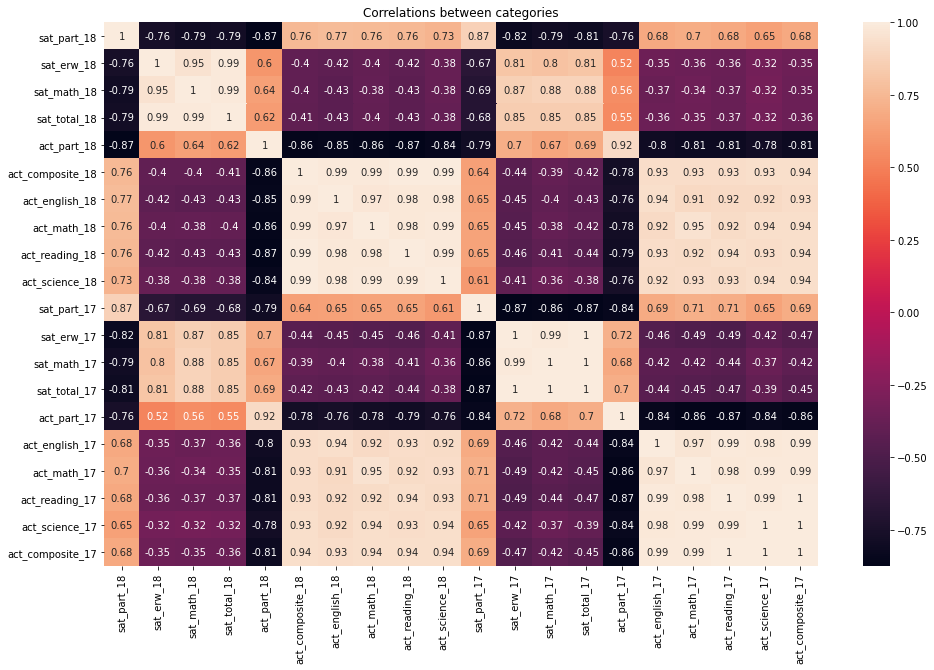

In [81]:
plt.figure(figsize=(16,10))
plt.title('Correlations between categories')
sns.heatmap(final.corr(),annot=True)


|**Heat plot shows the negative correlation between ACT participation and SAT participation rate**|


> <font size = 3 color = "crimson"> You want to pick the columns from which you are interpreting it. The heatmap is too large for identify just the act and sat participation. Also, be specific on which year</font>

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [82]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(14,12)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_columns[i])
    
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

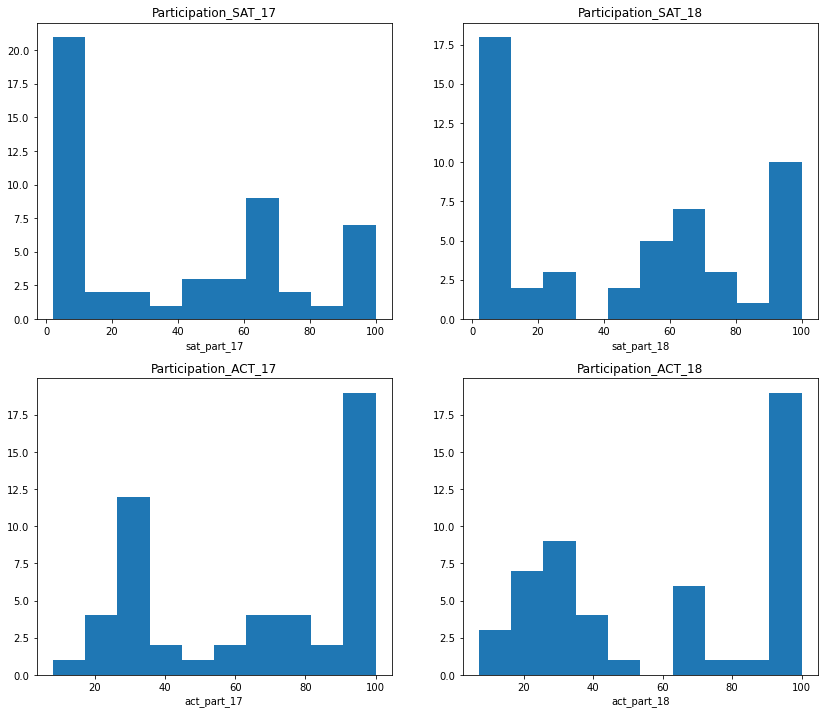

In [83]:
# Participation rates for SAT & ACT
columns = ['sat_part_17','sat_part_18','act_part_17','act_part_18']
titles = ['Participation_SAT_17','Participation_SAT_18', 'Participation_ACT_17','Participation_ACT_18']
xlabels = ['sat_part_17','sat_part_18','act_part_17','act_part_18']
subplot_histograms(final,columns, titles,xlabels);

MATH SCORES


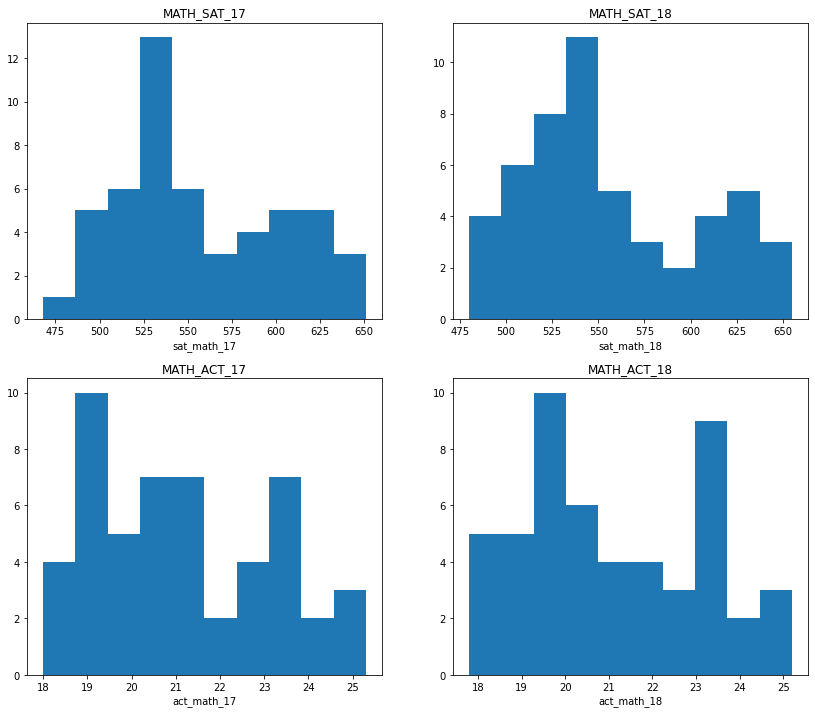

In [84]:
# Math scores for SAT & ACT
columns = ['sat_math_17','sat_math_18','act_math_17','act_math_18']
titles = ['MATH_SAT_17','MATH_SAT_18', 'MATH_ACT_17','MATH_ACT_18']
xlabels = ['math_sat_17','math_sat_18','math_act_17','mat_ahct_18']
print('MATH SCORES')
subplot_histograms(final,columns, titles,xlabels);

VERBAL SAT and ACT SCORES


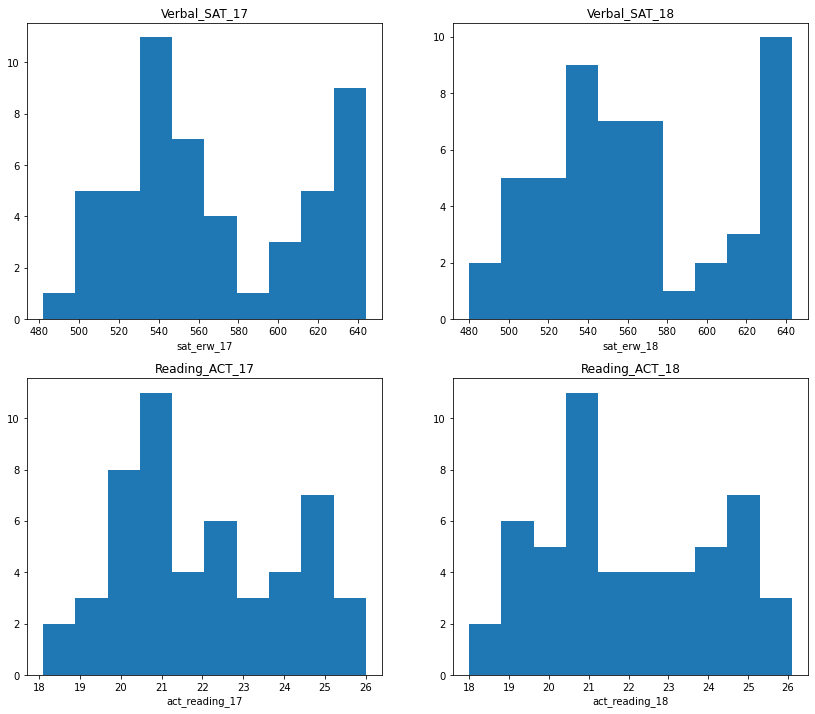

In [85]:
#Reading/verbal scores for SAT & ACT

columns = ['sat_erw_17','sat_erw_18','act_reading_17','act_reading_18']
titles = ['Verbal_SAT_17','Verbal_SAT_18', 'Reading_ACT_17','Reading_ACT_18']
xlabels = ['sat_verbal_17','sat_verbal_18','act_reading_17','act_reading_18']
print('VERBAL SAT and ACT SCORES')
subplot_histograms(final,columns, titles,xlabels);

> <font size = 3 color = "crimson"> You want to interpret the graphs</font>

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [86]:
def plot_scatter(df,x,y,title,xlabel,ylabel):
    plt.figure(figsize=(6, 6))
    plt.scatter(x,y);
    plt.title(title,fontsize =20)
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel(ylabel, fontsize =15)

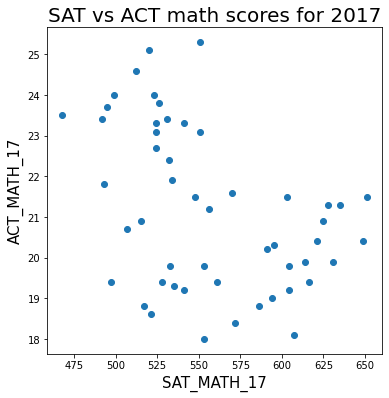

In [87]:
# SAT vs. ACT math scores for 2017
# Establish the size of the figure.
#plt.figure(figsize=(10, 6))
xlabel = 'SAT_MATH_17'
ylabel = 'ACT_MATH_17'
x = final['sat_math_17']
y= final['act_math_17']
title = 'SAT vs ACT math scores for 2017'
# Create scatter plot of SAT vs ACT math.
plot_scatter(final,x,y,title,xlabel,ylabel)
#plt.scatter(final['sat_math_17'],
 #           final['act_math_17']);

#plt.title("SAT vs ACT math scores for 2017",fontsize =20)
#plt.ylabel("ACT_MATH", fontsize =15)
#plt.xlabel("SAT_MATH", fontsize = 15);


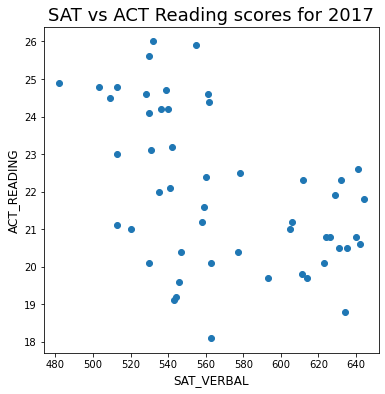

In [88]:
# SAT vs. ACT verbal/reading scores for 2017
# Establish the size of the figure.
plt.figure(figsize=(6, 6))

# Create scatter plot of SAT vs ACT verbal.
plt.scatter(final['sat_erw_17'],
            final['act_reading_17']);

plt.title("SAT vs ACT Reading scores for 2017",fontsize =18)
plt.ylabel("ACT_READING", fontsize =12)
plt.xlabel("SAT_VERBAL", fontsize = 12);

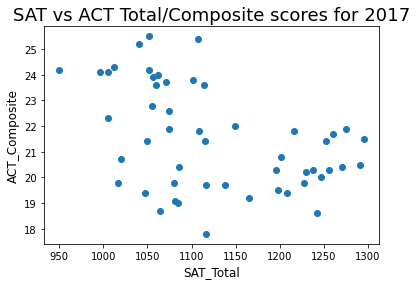

In [89]:
# SAT vs. ACT total/composite scores for 2017

# Create scatter plot of SAT vs ACT verbal.
plt.scatter(final['sat_total_17'],
            final['act_composite_17']);

plt.title("SAT vs ACT Total/Composite scores for 2017",fontsize =18)
plt.ylabel("ACT_Composite", fontsize =12)
plt.xlabel("SAT_Total", fontsize = 12);

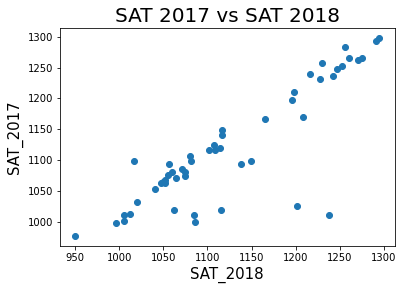

In [90]:
# Create scatter plot of SAT 2017 and 2018.
plt.scatter(final['sat_total_17'],
            final['sat_total_18']);

plt.title("SAT 2017 vs SAT 2018",fontsize =20)
plt.ylabel("SAT_2017", fontsize =15)
plt.xlabel("SAT_2018", fontsize = 15);

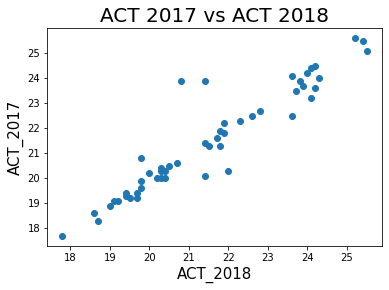

In [91]:
# Create scatter plot of SAT 2017 and 2018.
plt.scatter(final['act_composite_17'],
            final['act_composite_18']);

plt.title("ACT 2017 vs ACT 2018",fontsize =20)
plt.ylabel("ACT_2017", fontsize =15)
plt.xlabel("ACT_2018", fontsize = 15);

> <font size = 3 color = "crimson"> Interpret the graphs</font>

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [92]:
final.head()

,state,sat_part_18,sat_erw_18,sat_math_18,sat_total_18,act_part_18,act_composite_18,act_english_18,act_math_18,act_reading_18,...,sat_part_17,sat_erw_17,sat_math_17,sat_total_17,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,Alabama,6.0,595,571,1166,100,19.1,18.9,18.3,19.6,...,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,43.0,562,544,1106,33,20.8,19.8,20.6,21.6,...,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,29.0,577,572,1149,66,19.2,18.2,19.4,19.5,...,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,5.0,592,576,1169,100,19.4,19.1,18.9,19.7,...,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,60.0,540,536,1076,27,22.7,22.5,22.5,23.0,...,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


In [93]:
final.columns

Index(['state', 'sat_part_18', 'sat_erw_18', 'sat_math_18', 'sat_total_18',
       'act_part_18', 'act_composite_18', 'act_english_18', 'act_math_18',
       'act_reading_18', 'act_science_18', 'sat_part_17', 'sat_erw_17',
       'sat_math_17', 'sat_total_17', 'act_part_17', 'act_english_17',
       'act_math_17', 'act_reading_17', 'act_science_17', 'act_composite_17'],
      dtype='object')

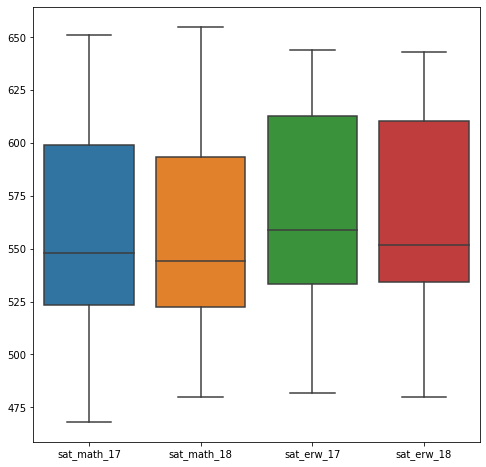

In [94]:
# Box plot to compare SAT 2017 and 2018  MATH data 
final_sat = final[['sat_math_17','sat_math_18','sat_erw_17','sat_erw_18']]
final_sat
plt.figure(figsize =(8,8))
sns.boxplot(data=final_sat);

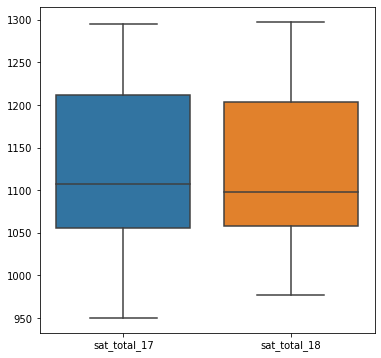

In [95]:
final_sat = final[['sat_total_17','sat_total_18']]
final_sat
plt.figure(figsize =(6,6))
sns.boxplot(data=final_sat);

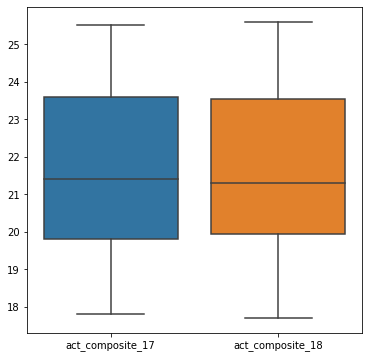

In [96]:
final_sat = final[['act_composite_17','act_composite_18']]
final_sat
plt.figure(figsize =(6,6))
sns.boxplot(data=final_sat);

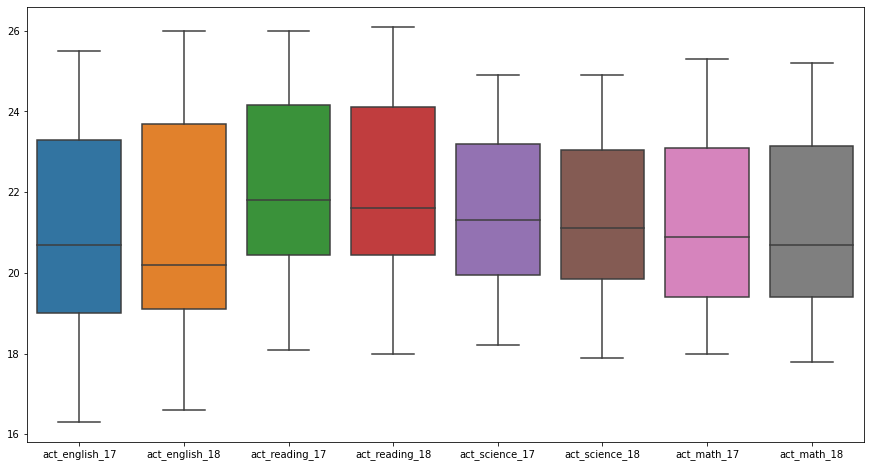

In [97]:
final_act = final[['act_english_17','act_english_18','act_reading_17','act_reading_18','act_science_17','act_science_18','act_math_17','act_math_18']]
final_act
plt.figure(figsize =(15,8))
sns.boxplot(data=final_act);

> <font size = 3 color = "crimson"> Interpret the graphs. </font>

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [98]:
final.describe()

,sat_part_18,sat_erw_18,sat_math_18,sat_total_18,act_part_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18,sat_part_17,sat_erw_17,sat_math_17,sat_total_17,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608
std,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695
min,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


 |Title | Type of Histogram |Details |
 |----|---|----|
       |Participation rates for SAT|  Bimodal| data range(0-100) peak at 10 and 95|
       |Participation rates for ACT |Bimodal | data range(0-100) peak at 15 and 95 |
       |Math scores for SAT17&18 |  Bimodal | data range(450-650) peak at 545 and samll peak at 625 |
       |Math scores for ACT17&18 |  Bimodal| data range(18-26) peak at 20 and 23 |
       | verbal scores for SAT|  Bimodal | data range(475-650) peak at 530 and 640 |
       | Reading scores for ACT|  Bimodal | data range(18-26) peak at 21 and 25|

 #### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer: Bimodal distribution is considered to be normal distributed with 2 peaks 

> <font size = 3 color = "crimson"> The distribution is not normal.(Bimodal is not considered normal.) They do not look normal, because the number of samples is only 51, far less to show as normal.</font>

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
- ACT Math distribution is clearly more of bimodal histogram with 2 peaks, One with higher variance and another with smaller variance
- ACT Reading is Bimodal distrinution with 2 peaks at 21 and 25
- Participation rate is Bimodal - peaks are not center around the mean value. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Since the population data of each state is not given, it will not be possible to conduct statistical inference 

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer: SAT Math and ACT math test are completely different test.
- The ACT Math section is rigorously timed, allowing 60 seconds per question maximum. The SAT Math section, because of its restructuring, is divided into two subsections: Calculator and No Calculator.
- ACT test has more geometrical questions 
- We cannot compare math test score of SAT and ACT so we cannot say students scoring well at SAT will do well at ACT. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [99]:
# H0: The difference of SAT participation rate between 2017 and 2018 is zero.
# H1: The difference of SAT participation rate between 2017 and 2018 is not zero
# alpha = 0.05  (t test)

sat_part_2017 = list(final['sat_part_17'])
sat_part_2018 = list(final['sat_part_18'])

print(np.mean(sat_part_2017))
print(np.mean(sat_part_2018))

39.80392156862745
45.745098039215684


In [100]:
# Conduct our t-test.
from scipy import stats
stats.ttest_ind(sat_part_2017,sat_part_2018)

Ttest_indResult(statistic=-0.8262650776952395, pvalue=0.4106208015719349)

In [101]:
#_value > alpha
# pvalue =0.41 > 0.05
# We don't have enough evidence to ignore null Hypothesis 

> <font size = 3 color = "crimson"> You cannot do hypothesis testing the way you have done it, because each participation comes from different sample sizes. So you cannot just look at the mean across all 51 states. </font>

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [102]:
final["total_part"] = final["sat_part_18"] - final["sat_part_17"]
final.sort_values(by="total_part",ascending=False)[['state','sat_part_17','sat_part_18','total_part']].head(5)

,state,sat_part_17,sat_part_18,total_part
13,Illinois,9.0,99.0,90.0
5,Colorado,11.0,100.0,89.0
39,Rhode Island,71.0,97.0,26.0
48,West Virginia,14.0,28.0,14.0
30,New Jersey,70.0,82.0,12.0


 ####  Illinois and Colorado has drastic change in the participation rate 

In [103]:
final.sort_values(by="total_part",ascending=False)[['state','sat_part_17','sat_part_18','total_part']].tail(5)

,state,sat_part_17,sat_part_18,total_part
50,Wyoming,3.0,3.0,0.0
2,Arizona,30.0,29.0,-1.0
28,Nevada,26.0,23.0,-3.0
8,District of Columbia,100.0,92.0,-8.0
9,Florida,83.0,56.0,-27.0


####  Florida state has 27 % negative participation rate change. SAT participation rate dropped. 

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

|**Takeaways**|:
- There is drastic increase in SAT participation rate in two states Colorado and Illinois.
- Colorado and Illinois switched from ACT Testing to mandatory SAT Testing in Spring 2017.
- This was due to statewide high school accountability 
   and every student in those states is now required to participate in SAT Testing.

|**Recommendations**|:
 - Improve access for US States to SAT School Day Programs
 - Improve access to free preparation material for students
 - Cost-saving incentives for state boards, public schools, and public students..
